<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# AI in Finance

**Workshop at Texas State University (October 2023)**

**_Simple Financial Examples_**

Dr. Yves J. Hilpisch | The Python Quants GmbH | http://tpq.io

## Imports

In [1]:
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn-v0_8')
%config InlineBackend.figure_format = 'svg'

## Stock Clustering

Data from [EODHistoricalData](https://eodhistoricaldata.com/r/?ref=X8R79ISB).

### The Data

In [2]:
f = pd.read_csv('https://certificate.tpq.io/eod_fundamentals.csv', index_col=0)

In [3]:
f

,AAPL,MSFT,AMZN,NFLX,META,GOOG,INTC,AMD,NVDA,GE,GS,BAC,JPM,MS
MarketCapitalization,2609191583744,2436963762176,1235158171648,179995901952,770738618368,1536753926144,137492054016,155193180160,1031941390336,121028968448,97908989952,206958166016,406937141248,118338936832
MarketCapitalizationMln,2609191.5837,2436963.7622,1235158.1716,179995.902,770738.6184,1536753.9261,137492.054,155193.1802,1031941.3903,121028.9684,97908.99,206958.166,406937.1412,118338.9368
EBITDA,123957002240,108530999296,63431000064,6371565056,51759001600,93340999680,8780000256,3100000000,12378999808,12026000384,NaN,NaN,NaN,NaN
PERatio,28.0017,31.7415,94.8968,43.8433,34.951,23.6475,NaN,NaN,101.1598,11.5713,14.3197,7.3165,8.3986,12.8696
PEGRatio,2.7503,2.2748,11.85,2.3693,2.6345,1.3438,12.6852,0.9019,4.0412,0.7414,1.2531,87.4797,1.1661,49.2853
WallStreetTargetPrice,187.73,370.22,160.61,433.98,341.68,135.34,33.59,129.11,594.21,125.83,358.75,32.07,161.22,86.27
BookValue,3.852,29.702,16.348,50.511,55.463,21.785,24.121,34.161,11.049,26.337,313.543,32.646,100.3,55.245
DividendShare,0.93,2.72,0.0,0.0,0.0,0.0,1.22,0.0,0.16,0.32,10.25,0.9,4.05,3.25
DividendYield,0.0058,0.0091,0.0,0.0,0.0,0.0,0.0145,0.0,0.0004,0.0029,0.0371,0.0368,0.0299,0.0476
EarningsShare,5.96,10.33,1.26,9.38,8.57,5.22,-0.23,-0.04,4.13,9.61,20.74,3.57,16.76,5.6


In [4]:
data = f.T[['QuarterlyRevenueGrowthYOY', 'ReturnOnEquityTTM']].astype(float)

In [5]:
data

,QuarterlyRevenueGrowthYOY,ReturnOnEquityTTM
AAPL,-0.014,1.6009
MSFT,0.128,0.3911
AMZN,0.108,0.0872
NFLX,0.078,0.2123
META,0.232,0.2228
GOOG,0.110,0.2533
INTC,-0.155,-0.0091
AMD,-0.182,-0.0005
NVDA,1.015,0.4022
GE,0.199,0.3502


In [6]:
data.columns = ['Growth', 'ROE']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, AAPL to MS
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Growth  14 non-null     float64
 1   ROE     14 non-null     float64
dtypes: float64(2)
memory usage: 892.0+ bytes


### Raw Data

In [8]:
from sklearn.cluster import KMeans

In [9]:
model = KMeans(n_clusters=3, n_init=2)  # 1.step: model instatiation

In [10]:
model.fit(data)  # 2. step: model fitting

KMeans(n_clusters=3, n_init=2)

In [11]:
c = model.predict(data)  # 3. step: prediction
c

array([1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0], dtype=int32)

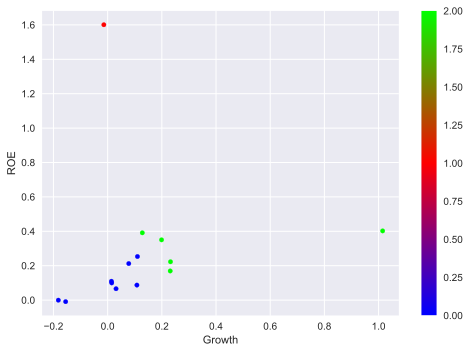

In [12]:
data.plot.scatter(x='Growth', y='ROE', c=c, cmap='brg');

### Normalized Data

In [13]:
data_ = (data - data.mean()) / data.std()  # Gaussian normalization/ z-score normalization

In [14]:
data_

,Growth,ROE
AAPL,-0.504663,3.276795
MSFT,-0.004528,0.269885
AMZN,-0.074970,-0.485446
NFLX,-0.180632,-0.174515
META,0.361768,-0.148417
GOOG,-0.067926,-0.072611
INTC,-1.001276,-0.724796
AMD,-1.096372,-0.703421
NVDA,3.119553,0.297474
GE,0.245539,0.168230


In [15]:
model = KMeans(n_clusters=5, init='random', n_init='auto', algorithm='lloyd')

In [16]:
model.fit(data_)

KMeans(init='random', n_clusters=5, n_init='auto')

In [17]:
c = model.predict(data_)
c

array([4, 1, 2, 2, 1, 1, 3, 3, 0, 1, 2, 2, 1, 2], dtype=int32)

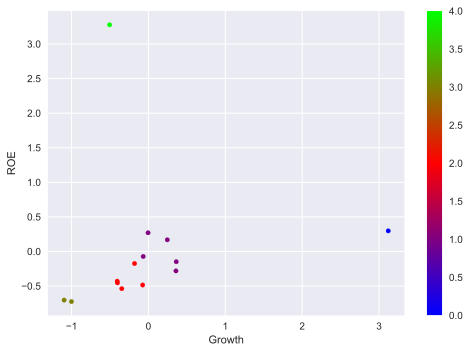

In [18]:
data_.plot.scatter(x='Growth', y='ROE', c=c, cmap='brg');

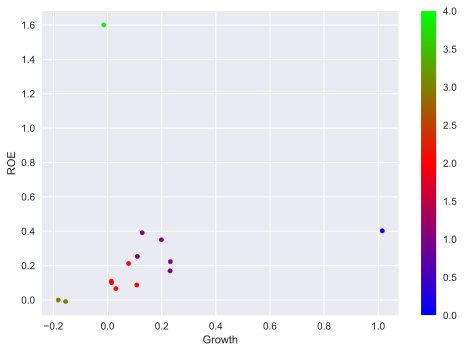

In [19]:
data.plot.scatter(x='Growth', y='ROE', c=c, cmap='brg');

### Adding 3rd Feature 

In [20]:
cols = ['QuarterlyRevenueGrowthYOY', 'ReturnOnEquityTTM', 'DividendYield']

In [21]:
data = f.T[cols].astype(float)

In [22]:
data

,QuarterlyRevenueGrowthYOY,ReturnOnEquityTTM,DividendYield
AAPL,-0.014,1.6009,0.0058
MSFT,0.128,0.3911,0.0091
AMZN,0.108,0.0872,0.0000
NFLX,0.078,0.2123,0.0000
META,0.232,0.2228,0.0000
GOOG,0.110,0.2533,0.0000
INTC,-0.155,-0.0091,0.0145
AMD,-0.182,-0.0005,0.0000
NVDA,1.015,0.4022,0.0004
GE,0.199,0.3502,0.0029


In [23]:
data.columns = ['Growth', 'ROE', 'DY']

In [24]:
model = KMeans(n_clusters=4, n_init=2)

In [25]:
model.fit(data)

KMeans(n_clusters=4, n_init=2)

In [26]:
c = model.predict(data)
c

array([1, 3, 0, 3, 3, 3, 0, 0, 2, 3, 0, 0, 3, 0], dtype=int32)

In [27]:
from mpl_toolkits import mplot3d

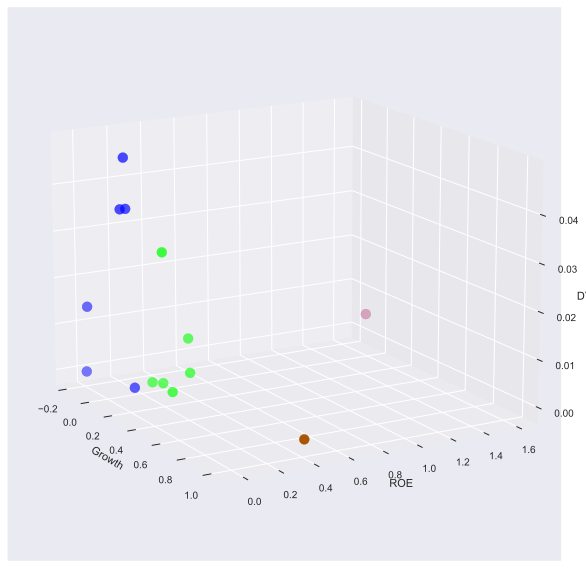

In [28]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ='3d')
ax.scatter3D(data['Growth'], data['ROE'], data['DY'],
             c=c, s=100, cmap='brg')
ax.set_xlabel('Growth')
ax.set_ylabel('ROE')
ax.set_zlabel('DY')
ax.view_init(elev=15, azim=-30);

In [29]:
data_ = (data - data.mean()) / data.std()

In [30]:
data_

,Growth,ROE,DY
AAPL,-0.504663,3.276795,-0.429630
MSFT,-0.004528,0.269885,-0.236735
AMZN,-0.074970,-0.485446,-0.768658
NFLX,-0.180632,-0.174515,-0.768658
META,0.361768,-0.148417,-0.768658
GOOG,-0.067926,-0.072611,-0.768658
INTC,-1.001276,-0.724796,0.078912
AMD,-1.096372,-0.703421,-0.768658
NVDA,3.119553,0.297474,-0.745276
GE,0.245539,0.168230,-0.599144


In [31]:
model = KMeans(n_clusters=5, init='random', n_init='auto', algorithm='lloyd')

In [32]:
model.fit(data_)

KMeans(init='random', n_clusters=5, n_init='auto')

In [33]:
c = model.predict(data_)
c

array([2, 0, 0, 0, 0, 0, 1, 1, 3, 0, 4, 4, 4, 4], dtype=int32)

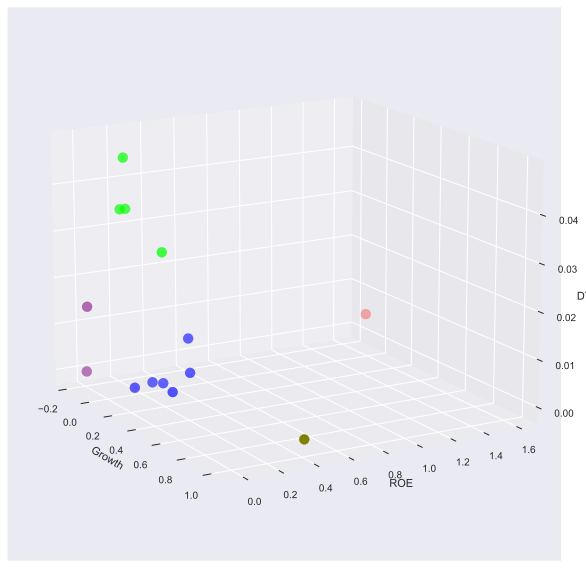

In [34]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ='3d')
ax.scatter3D(data['Growth'], data['ROE'], data['DY'],
             c=c, s=100, cmap='brg')
ax.set_xlabel('Growth')
ax.set_ylabel('ROE')
ax.set_zlabel('DY')
ax.view_init(elev=15, azim=-30);

## Stock Price Prediction

### The Data

In [35]:
path = 'https://certificate.tpq.io/eod_prices.csv'

In [36]:
raw = pd.read_csv(path, index_col=0, parse_dates=True)

In [37]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2348 entries, 2014-07-01 to 2023-10-26
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2348 non-null   float64
 1   MSFT    2348 non-null   float64
 2   AMZN    2348 non-null   float64
 3   NFLX    2348 non-null   float64
 4   META    2348 non-null   float64
 5   GOOG    2348 non-null   float64
 6   INTC    2348 non-null   float64
 7   AMD     2348 non-null   float64
 8   NVDA    2348 non-null   float64
 9   GE      2348 non-null   float64
 10  GS      2348 non-null   float64
 11  BAC     2348 non-null   float64
 12  JPM     2348 non-null   float64
 13  MS      2348 non-null   float64
dtypes: float64(14)
memory usage: 275.2 KB


In [38]:
symbol = 'GOOG'

In [39]:
data = pd.DataFrame(raw[symbol])

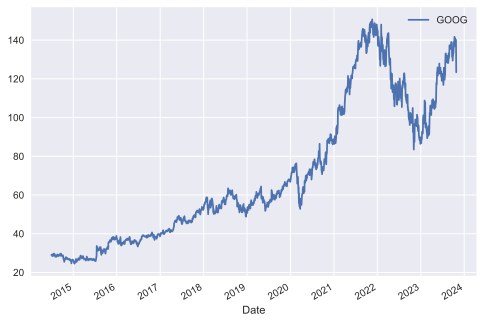

In [40]:
data.plot();

### Generating the Features (Prices)

In [41]:
lags = 5

In [42]:
cols = list()
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data[symbol].shift(lag)
    cols.append(col)

In [43]:
data.head(7)

,GOOG,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2014-07-01,29.0537,NaN,NaN,NaN,NaN,NaN
2014-07-02,29.0370,29.0537,NaN,NaN,NaN,NaN
2014-07-03,29.1564,29.0370,29.0537,NaN,NaN,NaN
2014-07-07,29.0328,29.1564,29.0370,29.0537,NaN,NaN
2014-07-08,28.4763,29.0328,29.1564,29.0370,29.0537,NaN
2014-07-09,28.7251,28.4763,29.0328,29.1564,29.0370,29.0537
2014-07-10,28.4768,28.7251,28.4763,29.0328,29.1564,29.0370


In [44]:
data.dropna(inplace=True)

### Prediction Stock Prices (OLS)

In [45]:
reg = np.linalg.lstsq(data[cols], data[symbol], rcond=-1)[0]
reg

array([ 0.96233247,  0.0219835 , -0.02333412,  0.02180985,  0.01760876])

In [46]:
data['pred_ols'] = np.dot(data[cols], reg)

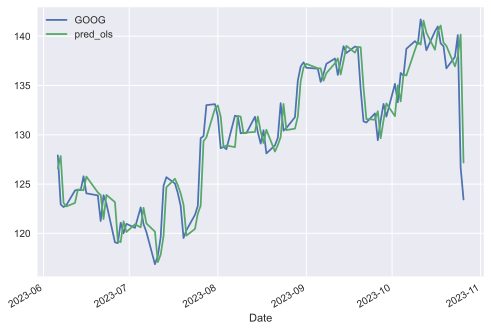

In [47]:
data[[symbol, 'pred_ols']].iloc[-100:].plot();

In [48]:
sum((data[symbol] - data['pred_ols']) ** 2) / len(data)

2.2065605959560513

### Predicting Stock Prices (ML)

In [49]:
data_ = (data - data.mean()) / data.std()

In [50]:
from sklearn.neural_network import MLPRegressor

In [51]:
model = MLPRegressor(hidden_layer_sizes=[24, 24],
                     max_iter=1000)

In [52]:
%time model.fit(data_[cols], data[symbol])

CPU times: user 1.01 s, sys: 8.99 ms, total: 1.02 s
Wall time: 1.02 s


MLPRegressor(hidden_layer_sizes=[24, 24], max_iter=1000)

In [53]:
data['pred_mlp'] = model.predict(data_[cols])

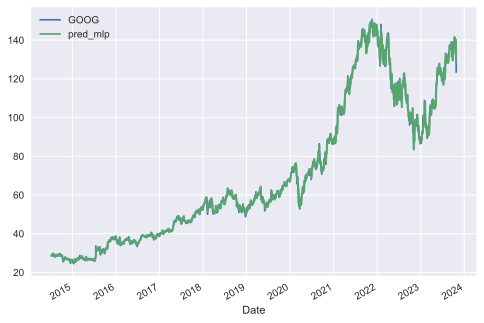

In [54]:
data[[symbol, 'pred_mlp']].plot();

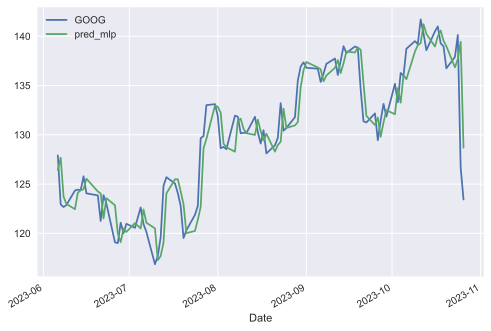

In [55]:
data[[symbol, 'pred_mlp']].iloc[-100:].plot();

In [56]:
sum((data[symbol] - data['pred_mlp']) ** 2) / len(data)

2.2754166571706125

### Generating the Features (Log Returns)

In [57]:
data = pd.DataFrame(raw[symbol])

In [58]:
data['r'] = np.log(data[symbol] / data[symbol].shift(1))

In [59]:
data['d'] = np.sign(data['r'])

In [60]:
data.head()

,GOOG,r,d
Date,,,
2014-07-01,29.0537,NaN,NaN
2014-07-02,29.0370,-0.000575,-1.0
2014-07-03,29.1564,0.004104,1.0
2014-07-07,29.0328,-0.004248,-1.0
2014-07-08,28.4763,-0.019354,-1.0


In [61]:
lags = 5

In [62]:
cols = list()
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['r'].shift(lag)
    cols.append(col)

In [63]:
data.head(7)

,GOOG,r,d,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,
2014-07-01,29.0537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-02,29.0370,-0.000575,-1.0,NaN,NaN,NaN,NaN,NaN
2014-07-03,29.1564,0.004104,1.0,-0.000575,NaN,NaN,NaN,NaN
2014-07-07,29.0328,-0.004248,-1.0,0.004104,-0.000575,NaN,NaN,NaN
2014-07-08,28.4763,-0.019354,-1.0,-0.004248,0.004104,-0.000575,NaN,NaN
2014-07-09,28.7251,0.008699,1.0,-0.019354,-0.004248,0.004104,-0.000575,NaN
2014-07-10,28.4768,-0.008682,-1.0,0.008699,-0.019354,-0.004248,0.004104,-0.000575


In [64]:
data.dropna(inplace=True)

### Prediction Stock Prices (OLS)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
reg = np.linalg.lstsq(data[cols], data['d'], rcond=-1)[0]
reg

array([-0.56121252, -0.24643531, -2.76533302, -1.09320495, -1.70848375])

In [67]:
data['pred_ols'] = np.dot(data[cols], reg)

In [68]:
data.head()

,GOOG,r,d,lag_1,lag_2,lag_3,lag_4,lag_5,pred_ols
Date,,,,,,,,,
2014-07-10,28.4768,-0.008682,-1.0,0.008699,-0.019354,-0.004248,0.004104,-0.000575,0.008131
2014-07-11,28.8797,0.014049,1.0,-0.008682,0.008699,-0.019354,-0.004248,0.004104,0.053882
2014-07-14,29.1634,0.009776,1.0,0.014049,-0.008682,0.008699,-0.019354,-0.004248,-0.001385
2014-07-15,29.1589,-0.000154,-1.0,0.009776,0.014049,-0.008682,0.008699,-0.019354,0.038615
2014-07-16,29.0532,-0.003632,-1.0,-0.000154,0.009776,0.014049,-0.008682,0.008699,-0.046545


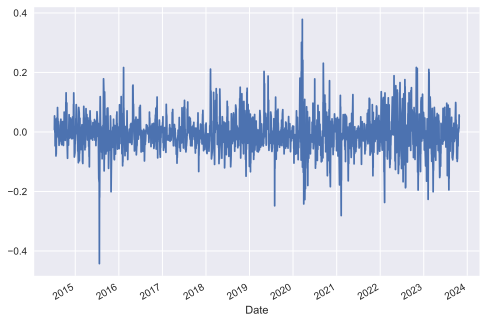

In [69]:
data['pred_ols'].plot();

In [70]:
p = np.sign(data['pred_ols'])
p[:10]

Date
2014-07-10    1.0
2014-07-11    1.0
2014-07-14   -1.0
2014-07-15    1.0
2014-07-16   -1.0
2014-07-17   -1.0
2014-07-18   -1.0
2014-07-21   -1.0
2014-07-22    1.0
2014-07-23   -1.0
Name: pred_ols, dtype: float64

In [71]:
accuracy_score(data['d'], p)

0.5234842015371477

In [72]:
data['s'] = p * data['r']

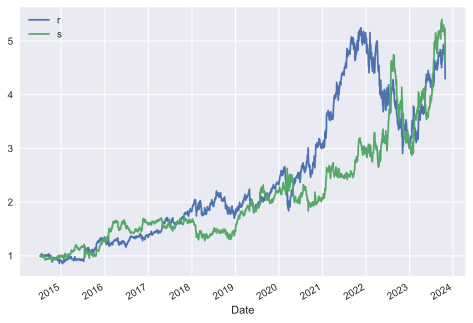

In [73]:
data[['r', 's']].cumsum().apply(np.exp).plot();

### Predicting Stock Prices (ML)

In [74]:
data_ = (data - data.mean()) / data.std()

In [75]:
from sklearn.neural_network import MLPClassifier

In [76]:
model = MLPClassifier(hidden_layer_sizes=[24],
                     max_iter=1000)

In [77]:
%time model.fit(data_[cols], data['d'])

CPU times: user 127 ms, sys: 2.69 ms, total: 130 ms
Wall time: 129 ms


MLPClassifier(hidden_layer_sizes=[24], max_iter=1000)

In [78]:
data['pred_mlp'] = model.predict(data_[cols])

In [79]:
data['pred_mlp'].value_counts()

pred_mlp
 1.0    1814
-1.0     528
Name: count, dtype: int64

In [80]:
accuracy_score(data['d'], data['pred_mlp'])

0.5602049530315969

In [81]:
data['s'] = data['pred_mlp'] * data['r']

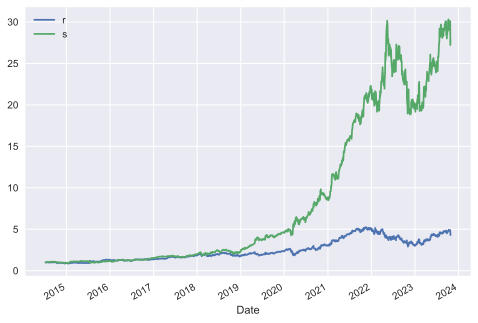

In [82]:
data[['r', 's']].cumsum().apply(np.exp).plot();

In [83]:
model.predict_proba(data_[cols])[:10]

array([[0.44141912, 0.55858088],
       [0.48965448, 0.51034552],
       [0.42682497, 0.57317503],
       [0.41386675, 0.58613325],
       [0.48185208, 0.51814792],
       [0.46668851, 0.53331149],
       [0.4765869 , 0.5234131 ],
       [0.52562714, 0.47437286],
       [0.4786146 , 0.5213854 ],
       [0.47264562, 0.52735438]])

In [84]:
np.argmax(model.predict_proba(data_[cols]), axis=1)[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [85]:
model.predict(data_[cols])[:10]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.])

## Exercise

Using NumPy, generate a random walk with a fixed seed.

Try to predict the future movement (direction) of the random walk and a real financial time series with

* OLS regression and
* ML supervised learning (e.g. MLP)

Implement the analysis both

* (only in-sample and)
* with train-**test** split (!!!)

What can you say about the accuracy ratios for all cases?

<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<img src='http://hilpisch.com/tpq_logo.png' width="35%" align="right">

<br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">ai@tpq.io</a>